In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import matthews_corrcoef

%matplotlib widget

In [2]:
seed = 1
testsize = "0.33"
path = "/Users/kassand/astro/PlanetMigration_ML/training_data/"

ylabel = "flag"

df_train = pd.read_pickle(path + "train_data_seed_" + str(seed) + "_testsize_0.33.pkl")
df_test = pd.read_pickle(path + "test_data_seed_" + str(seed) + "_testsize_0.33.pkl")

In [3]:
# Define list of features combination names (previously defined when the models were trained)
#feature_list = ["orb", "eps", "emax", "orb_eps", "eps_emax", "orb_eps_emax"]
#feature_list_for_plot = ["orb", "eps", "emax", "orb + eps", "eps + emax", "orb + eps + emax"]

#feature_list = ["orb", "eps", "emax", "orb_eps", "eps_emax", "orb_eps_emax", "eps_emax_rtide"]
#feature_list_for_plot = ["orb", "eps", "emax", "orb + eps", "eps + emax", "orb + eps + emax", "eps + emax + rtide"]
feature_list = ["inputvars", 
                "eps+inc", 
                "inputvars+eps+emax", 
                "eps+emax", "eps+emax+inc", 
                "eps+emax-powers", 
                "eps+emax-powers+inc"]
feature_list_for_plot = feature_list

scaler = "standardscaler"
resampler = "smote"

In [4]:
path = "/Users/kassand/astro/PlanetMigration_ML/tuned_models/feature_exploration/"


def get_scores(path, model_name, feature_list):
    
    """ Loads the previously-trained models and calculates and returns the train/test scores """

    scorelist_train = []
    scorelist_test = []

    for f in feature_list:
        fname = path + model_name + "_standardscaler_smote_features_" + f + "_seed_" + str(seed) + "_testsize_" + testsize + "_cv_nsplits_5.pkl"
        
        with open(fname, 'rb') as file:
            model = pickle.load(file)

        feature_names = list(model.feature_names_in_)

        X_train, y_train = df_train[feature_names], df_train[ylabel]
        X_test, y_test = df_test[feature_names], df_test[ylabel]

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        mscore_train = matthews_corrcoef(y_train, y_train_pred)
        mscore_test = matthews_corrcoef(y_test, y_test_pred)

        scorelist_train.append(mscore_train)
        scorelist_test.append(mscore_test)
        
    return scorelist_train, scorelist_test

In [5]:
score_train_LR, score_test_LR = get_scores(path, "LR", feature_list)
score_train_RF, score_test_RF = get_scores(path, "RF", feature_list)

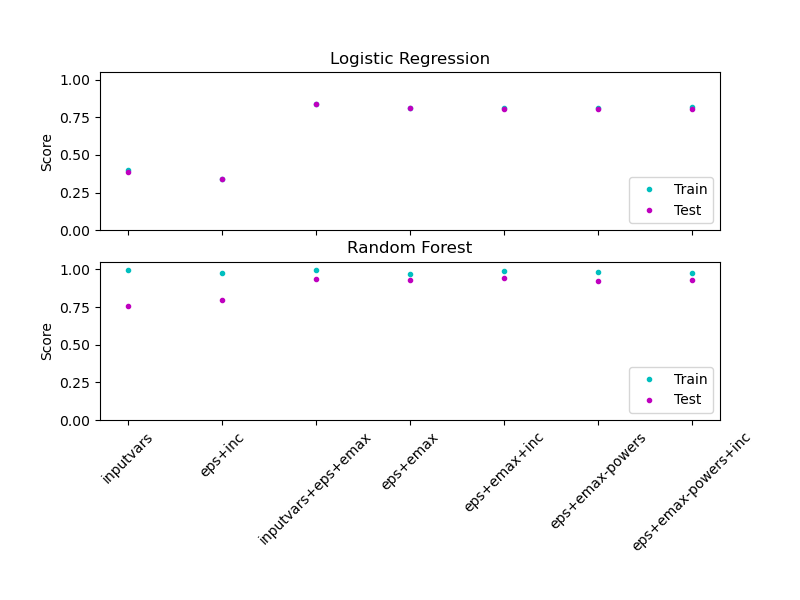

In [6]:
c1 = 'c'
c2 = 'm'

plt.figure(1, figsize = (8,6))
ax1 = plt.subplot(2,1,1)
ax1.set_title("Logistic Regression")
ax1.plot(feature_list_for_plot, score_train_LR,color = c1, marker = '.', linestyle = '', label = "Train")
ax1.plot(feature_list_for_plot, score_test_LR,color = c2, marker = '.', linestyle = '', label = "Test")
ax1.legend(loc = 4)
ax1.set_ylim(0,1.05)
ax1.set_xticklabels([])
ax1.set_ylabel("Score")

ax2 = plt.subplot(2,1,2)
ax2.set_title("Random Forest")
ax2.plot(feature_list_for_plot, score_train_RF,color = c1, marker = '.', linestyle = '', label = "Train")
ax2.plot(feature_list_for_plot, score_test_RF,color = c2, marker = '.', linestyle = '', label = "Test")
ax2.legend(loc = 4)
ax2.set_ylim(0,1.05)
ax2.set_xticklabels(feature_list_for_plot, rotation = 45)
ax2.set_ylabel("Score")

plt.subplots_adjust(bottom = 0.3, wspace = 0.3)
plt.savefig("../images/compare_features.png")
plt.show()